# Optimización Heuristica

## Integrantes
- Diego Fernando Chávez Henao
- Jakelin Daiana Correa Palacio
- Andrés Felipe Lema García
- Luis Felipe Moreno Chamorro

## Librerías necesarias

In [1]:
pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jakel\envs\RNYA\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# Notebook
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# .py
from scipy.optimize import minimize
from scipy.optimize import differential_evolution, minimize, dual_annealing
from scipy.optimize import basinhopping, shgo
from matplotlib.animation import FuncAnimation

## Parte 1: optimización numérica

### 1. Funciones de prueba elegidas.
Se escogen las funciones:
- Rosenbrock
- Rastrigin

In [3]:
# Parte 1: optimización numérica

# 1. Escoja dos funciones de prueba

# Seleccionamos Función de Rosenbrock y Función de Rastrigin y las definimos

def rosenbrock(x):
    return sum(100.0 * np.square((x[1:] - np.square(x[:-1]))) + (1 - np.square(x[:-1])))

def rastrigin(x):
    return 10 * len(x) + sum(np.square(x) - 10 * np.cos(2 * np.pi * x))

#Función que uso para gráficar, porque me parece que la de arriba solo funciona para una arreglo unidimensional
def rastrigin2(x, A=10):
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

### Función de Rosenbrock

Visualicemos como luce la función de Rosenbrock en 2d y en 3d, para hacernos una idea del proceso de optimización.

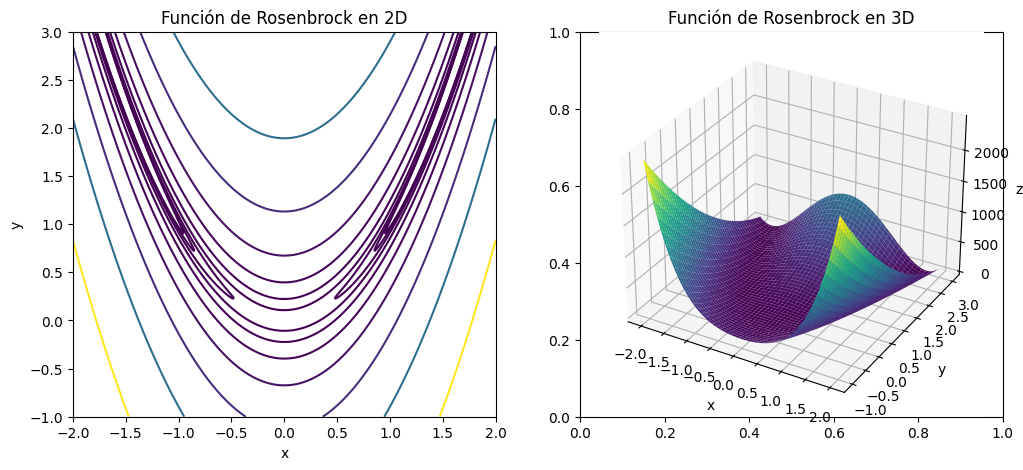

In [5]:
# Generamos datos para graficar en 2D
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z_2d = rosenbrock([X, Y])

# Generamos datos para graficar en 3d
x_3d = np.linspace(-2, 2, 100)
y_3d = np.linspace(-1, 3, 100)
X_3d, Y_3d = np.meshgrid(x_3d, y_3d)
Z_3d = rosenbrock([X_3d, Y_3d])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Grafica en 2D
axs[0].contour(X, Y, Z_2d, levels=np.logspace(-1, 3, 10), cmap='viridis')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Función de Rosenbrock en 2D')

# Grafica en 3D
axs[1] = fig.add_subplot(122, projection='3d')
axs[1].plot_surface(X_3d, Y_3d, Z_3d, cmap='viridis')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_zlabel('z')
axs[1].set_title('Función de Rosenbrock en 3D')

plt.show()

#### Función de Rastrigin

Visualicemos como luce la función de Rastrigin en 2d y en 3d, para hacernos una idea del proceso de optimización.

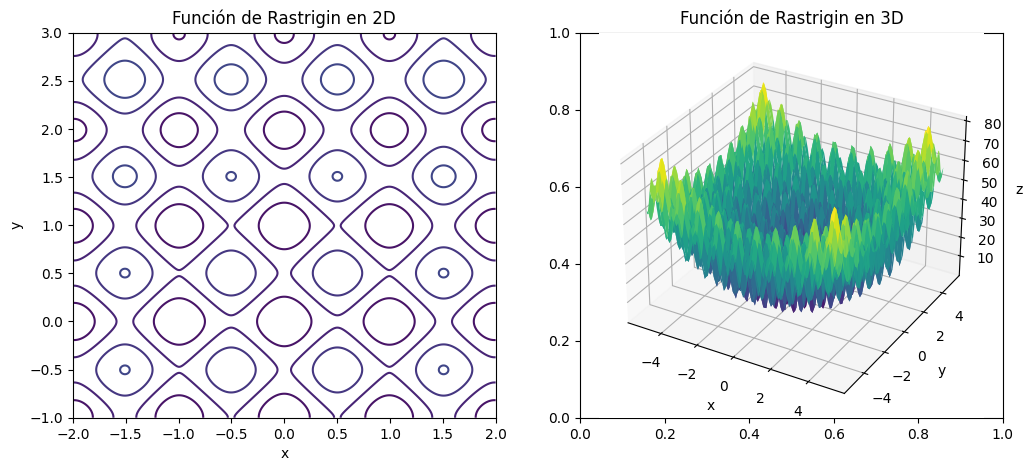

In [6]:
#Gráfica en 2D
x1 = np.linspace(-5.12, 5.12, 400)
x2 = np.linspace(-5.12, 5.12, 400)
X1, X2 = np.meshgrid(x1, x2)
X, Y = np.meshgrid(x, y)
Z_2d = rastrigin2([X, Y])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].contour(X, Y, Z_2d, levels=np.linspace(0, 200, 20), cmap='viridis')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Función de Rastrigin en 2D')

# Grafica en 3d
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = rastrigin2([X[i,j], Y[i,j]])

axs[1] = fig.add_subplot(122, projection='3d')
axs[1].plot_surface(X, Y, Z, cmap='viridis')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_zlabel('z')
axs[1].set_title('Función de Rastrigin en 3D')

plt.show()

### 2. Optimización de funciones usando descenso por gradiente.
Procedemos a optimizar las funciones en dos y tres dimensiones usando el método de descenso por gradiente con condición inicial aleatoria.

In [7]:
# Definimos el metodo

# Método de descenso por gradiente
def gradient_descent(func, dim):
    x0 = np.random.rand(dim)
    result = minimize(func, x0, method='L-BFGS-B')
    return result.x, result.fun

# Optimización en 2 dimensiones

dim_2 = 2

rosenbrock_gd_2 = gradient_descent(rosenbrock, dim_2)
rastrigin_gd_2 = gradient_descent(rastrigin, dim_2)

# Optimización en 3 dimensiones

dim_3 = 3

rosenbrock_gd_3 = gradient_descent(rosenbrock, dim_3)
rastrigin_gd_3 = gradient_descent(rastrigin, dim_3)

### Punto 3.
Optimice las funciones en dos y tres dimensiones usando: algoritmos evolutivos, optimización de partículas y evolución diferencial

In [8]:
# Definimos los metodos

# Algoritmos evolutivos
def evolutionary_algorithm(func, dim):
    bounds = [(0, 1)] * dim
    result = differential_evolution(func, bounds)
    return result.x, result.fun

# Optimización de partículas
def particle_optimization(func, dim):
    bounds = [(0, 1)] * dim
    result = basinhopping(func, np.random.rand(dim), niter=100, minimizer_kwargs={"bounds": bounds})
    return result.x, result.fun

# Evolución diferencial
def differential_evolution_optimization(func, dim):
    bounds = [(0, 1)] * dim
    result = differential_evolution(func, bounds)
    return result.x, result.fun


In [9]:
# Optimización en 2 dimensiones

dim_2 = 2

rosenbrock_ea_2 = evolutionary_algorithm(rosenbrock, dim_2)
rastrigin_ea_2 = evolutionary_algorithm(rastrigin, dim_2)

rosenbrock_po_2 = particle_optimization(rosenbrock, dim_2)
rastrigin_po_2 = particle_optimization(rastrigin, dim_2)

rosenbrock_de_2 = differential_evolution_optimization(rosenbrock, dim_2)
rastrigin_de_2 = differential_evolution_optimization(rastrigin, dim_2)


# Optimización en 3 dimensiones

dim_3 = 3

rosenbrock_ea_3 = evolutionary_algorithm(rosenbrock, dim_3)
rastrigin_ea_3 = evolutionary_algorithm(rastrigin, dim_3)

rosenbrock_po_3 = particle_optimization(rosenbrock, dim_3)
rastrigin_po_3 = particle_optimization(rastrigin, dim_3)

rosenbrock_de_3 = differential_evolution_optimization(rosenbrock, dim_3)
rastrigin_de_3 = differential_evolution_optimization(rastrigin, dim_3)


In [10]:
# Imprimimos resultados

print("\n","Resultados en 2 dimenciones","\n")

print("Rosenbrock - Gradiente Descendente (2D):", rosenbrock_gd_2)
print("Rastrigin - Gradiente Descendente (2D):", rastrigin_gd_2)

print("Rosenbrock - Algoritmo Evolutivo (2D):", rosenbrock_ea_2)
print("Rastrigin - Algoritmo Evolutivo (2D):", rastrigin_ea_2)

print("Rosenbrock - Optimización de Partículas (2D):", rosenbrock_po_2)
print("Rastrigin - Optimización de Partículas (2D):", rastrigin_po_2)

print("Rosenbrock - Evolución Diferencial (2D):", rosenbrock_de_2)
print("Rastrigin - Evolución Diferencial (2D):", rastrigin_de_2)

print("\n","Resultados en 3 dimensiones","\n")

print("Rosenbrock - Gradiente Descendente (3D):", rosenbrock_gd_3)
print("Rastrigin - Gradiente Descendente (3D):", rastrigin_gd_3)

print("Rosenbrock - Algoritmo Evolutivo (3D):", rosenbrock_ea_3)
print("Rastrigin - Algoritmo Evolutivo (3D):", rastrigin_ea_3)

print("Rosenbrock - Optimización de Partículas (3D):", rosenbrock_po_3)
print("Rastrigin - Optimización de Partículas (3D):", rastrigin_po_3)

print("Rosenbrock - Evolución Diferencial (3D):", rosenbrock_de_3)
print("Rastrigin - Evolución Diferencial (3D):", rastrigin_de_3)



 Resultados en 2 dimenciones 

Rosenbrock - Gradiente Descendente (2D): (array([2.91901082e+03, 8.52062417e+06]), -8520623.17200744)
Rastrigin - Gradiente Descendente (2D): (array([0.99495863, 0.99495863]), 1.989918114186601)
Rosenbrock - Algoritmo Evolutivo (2D): (array([1., 1.]), 0.0)
Rastrigin - Algoritmo Evolutivo (2D): (array([1.89631810e-09, 1.41086437e-09]), 0.0)
Rosenbrock - Optimización de Partículas (2D): (array([1., 1.]), 0.0)
Rastrigin - Optimización de Partículas (2D): (array([0., 0.]), 0.0)
Rosenbrock - Evolución Diferencial (2D): (array([1., 1.]), 0.0)
Rastrigin - Evolución Diferencial (2D): (array([3.11162979e-09, 2.35765130e-10]), 0.0)

 Resultados en 3 dimenciones 

Rosenbrock - Gradiente Descendente (3D): (array([4.70078648e+01, 2.20617526e+03, 4.86720612e+06]), -4867142.202026001)
Rastrigin - Gradiente Descendente (3D): (array([ 0.99495863, -0.99495866,  0.9949586 ]), 2.9848771712802353)
Rosenbrock - Algoritmo Evolutivo (3D): (array([1., 1., 1.]), 0.0)
Rastrigin - 

### Punto 4.
Represente con un gif animado o un video el proceso de optimización de descenso por gradiente y el proceso usando el método heurístico.

In [ ]:
# Función de prueba (Rosenbrock)
def rosenbrock(x):
    return sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# Gradiente de la función de prueba (Rosenbrock)
def rosenbrock_gradient(x):
    gradient = np.zeros_like(x)
    gradient[0] = -400.0 * x[0] * (x[1] - x[0]**2) - 2.0 * (1 - x[0])
    gradient[1:-1] = 200.0 * (x[1:-1] - x[:-2]**2) - 400.0 * x[1:-1] * (x[2:] - x[1:-1]**2) - 2.0 * (1 - x[1:-1])
    gradient[-1] = 200.0 * (x[-1] - x[-2]**2)
    return gradient

# Métodos heurísticos
def evolutionary_algorithm(func, dim):
    bounds = [(0, 1)] * dim
    result = differential_evolution(func, bounds)
    return result.x, result.fun

def particle_optimization(func, dim):
    bounds = [(0, 1)] * dim
    result = basinhopping(func, np.random.rand(dim), niter=100, minimizer_kwargs={"bounds": bounds})
    return result.x, result.fun

def differential_evolution_optimization(func, dim):
    bounds = [(0, 1)] * dim
    result = differential_evolution(func, bounds)
    return result.x, result.fun


In [ ]:
# Inicialización de datos
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(np.array([X, Y]))

# Método de descenso por gradiente
def gradient_descent_animation():
    x0 = np.array([-1.5, 2.0])  # Condición inicial
    iterations = [x0]

    def update(frame):
        nonlocal x0
        gradient = rosenbrock_gradient(x0)
        x0 = x0 - 0.01 * gradient  # Tasa de aprendizaje
        iterations.append(x0.copy())
        ax.clear()
        ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")
        ax.plot([point[0] for point in iterations], [point[1] for point in iterations], marker='o', color='red')

# Método heurístico (Differential Evolution)
def differential_evolution_animation():
    result = differential_evolution(rosenbrock, bounds=[(-2, 2), (-1, 3)])
    iterations = [result.x]

    def update(frame):
        nonlocal iterations
        ax.clear()
        ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")
        ax.plot([point[0] for point in iterations], [point[1] for point in iterations], marker='o', color='blue')

# Método heurístico (Algoritmos Evolutivos)
def evolutionary_algorithm_animation():
    bounds = [(0, 1), (0, 1)]
    result = differential_evolution(rosenbrock, bounds=bounds)
    iterations = [result.x]

    def update(frame):
        nonlocal iterations
        ax.clear()
        ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")
        ax.plot([point[0] for point in iterations], [point[1] for point in iterations], marker='o', color='green')

# Método heurístico (Optimización de Partículas)
def particle_optimization_animation():
    bounds = [(0, 1), (0, 1)]
    result = basinhopping(rosenbrock, np.random.rand(2), niter=100, minimizer_kwargs={"bounds": bounds})
    iterations = [result.x]

    def update(frame):
        nonlocal iterations
        ax.clear()
        ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")
        ax.plot([point[0] for point in iterations], [point[1] for point in iterations], marker='o', color='purple')


In [ ]:
# Crear la animación combinada
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")

# Animación de descenso por gradiente
gradient_descent_animation()

# Animación de evolución diferencial
differential_evolution_animation()

# Animación de algoritmos evolutivos
evolutionary_algorithm_animation()

# Animación de optimización de partículas
particle_optimization_animation()

plt.show()


# Discuta ¿Qué aportaron los métodos de descenso por gradiente y qué aportaron los métodos heurísticos? 
# Para responder a esta pregunta considere el valor final de la función objetivo y el número de evaluaciones 
# de la función objetivo. Para responder a esta pregunta es posible que se requiera hacer varias corridas de los algoritmos.


## Parte 2: optimización combinatoria



Un vendedor debe hacer un recorrido por las siguientes ciudades de Colombia en su carro (no necesariamente en este orden):
- Palmira
- Pasto
- Tuluá
- Bogota
- Pereira
- Armenia
- Manizales
- Valledupar
- Montería
- Soledad
- Cartagena
- Barranquilla
- Medellín
- Bucaramanga
- Cúcuta

Utilice colonias de hormigas y algoritmos genéticos para encontrar el orden óptimo. El costo de desplazamiento entre ciudades es la suma del valor de la hora del vendedor (es un parámetro que debe estudiarse), el costo de los peajes y el costo del combustible. Cada equipo debe definir en qué carro hace el recorrido el vendedor y de allí extraer el costo del combustible.

Adicionalmente represente con un gif animado o un video cómo se comporta la mejor solución usando un gráfico del recorrido en el mapa de Colombia

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from itertools import permutations
from matplotlib.animation import FuncAnimation


In [ ]:
# Definimos las ciudades y sus coordenadas en el mapa TEMPORAL!!!!!
cities = {
    'Palmira': (3, 2),
    'Pasto': (4, 5),
    'Tuluá': (1, 4),
    'Bogota': (2, 6),
    'Pereira': (3, 3),
    'Armenia': (2, 3),
    'Manizales': (1, 5),
    'Valledupar': (6, 1),
    'Montería': (5, 2),
    'Soledad': (7, 4),
    'Cartagena': (6, 4),
    'Barranquilla': (8, 5),
    'Medellín': (1, 6),
    'Bucaramanga': (2, 8),
    'Cúcuta': (3, 9)
}

# Calculamos la matriz de distancias entre ciudades
dist_matrix = distance_matrix(list(cities.values()), list(cities.values()))


In [ ]:
# Algoritmo genético que encuentra la mejor ruta
def genetic_algorithm(num_generations, population_size, crossover_rate, mutation_rate):
    num_cities = len(cities)
    population = np.array([np.random.permutation(num_cities) for _ in range(population_size)])

    for generation in range(num_generations):
        fitness = np.array([calculate_fitness(route) for route in population])
        sorted_indices = np.argsort(fitness)
        population = population[sorted_indices]

        # Seleccionar padres
        parents = population[:int(population_size * crossover_rate)]

        # Cruzar padres para crear hijos
        offspring = crossover(parents, population_size)

        # Aplicar mutación
        mutate(offspring, mutation_rate)

        # Reemplazar población antigua con la nueva generación
        population = np.vstack((parents, offspring))

    best_route = population[0]
    return best_route

# Función de costo !Tenemos que ajustar según los costos reales!!!!!!
def calculate_fitness(route):
    total_distance = sum(dist_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
    return total_distance

# Operador de cruce (crossover)
def crossover(parents, population_size):
    num_parents = len(parents)
    num_offspring = population_size - num_parents
    offspring = np.empty((num_offspring, len(parents[0])), dtype=int)

    for i in range(num_offspring):
        parent1, parent2 = np.random.choice(num_parents, size=2, replace=False)
        crossover_point = np.random.randint(1, len(parents[0]) - 1)
        offspring[i, :crossover_point] = parents[parent1, :crossover_point]
        offspring[i, crossover_point:] = [city for city in parents[parent2] if city not in offspring[i, :crossover_point]]

    return offspring

# Operador de mutación
def mutate(offspring, mutation_rate):
    for child in offspring:
        if np.random.rand() < mutation_rate:
            mutation_indices = np.random.choice(len(child), size=2, replace=False)
            child[mutation_indices[0]], child[mutation_indices[1]] = child[mutation_indices[1]], child[mutation_indices[0]]


In [ ]:
# Función para visualizar el recorrido en el mapa de Colombia
def plot_route(route):
    x = [list(cities.values())[city][0] for city in route]
    y = [list(cities.values())[city][1] for city in route]

    fig, ax = plt.subplots()
    ax.plot(x, y, marker='o', linestyle='-', color='b')
    ax.plot(x[0], y[0], marker='o', color='r', label='Inicio/Final')
    ax.legend()
    ax.set_title('Mejor Ruta')
    plt.show()

# Animación del proceso de optimización
def animate_optimization(best_routes):
    fig, ax = plt.subplots()
    plt.scatter(*zip(*list(cities.values())), color='red')  # Marcadores de ciudades
    line, = ax.plot([], [], linestyle='-', color='blue', marker='o')

    def update(frame):
        route = best_routes[frame]
        x = [cities[city][0] for city in route]
        y = [cities[city][1] for city in route]
        line.set_data(x, y)
        return line,

    ani = FuncAnimation(fig, update, frames=len(best_routes), interval=500, blit=True)
    plt.show()


In [ ]:
# Parámetros del algoritmo genético
num_generations = 100
population_size = 100
crossover_rate = 0.6
mutation_rate = 0.02

# Ejecutar el algoritmo genético
best_route = genetic_algorithm(num_generations, population_size, crossover_rate, mutation_rate)

# Visualizar la mejor ruta
plot_route(best_route)

# Visualizar animación del proceso de optimización
all_routes = list(permutations(cities.keys()))
best_routes = [genetic_algorithm(1, 100, 0.6, 0.02)[0] for _ in range(50)]  # 50 generaciones para la animación
animate_optimization(best_routes)
